In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# Read the CSV file with specified data types
df_train = pd.read_csv("/train.csv")

In [ ]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [ ]:
#check for missing values
df_train.isnull().values.any()


False

In [ ]:
df_train["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
pd.crosstab(index = df_train["Activity"],columns="count")

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


In [ ]:
X = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
Y = df_train.Activity.values.astype(object)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


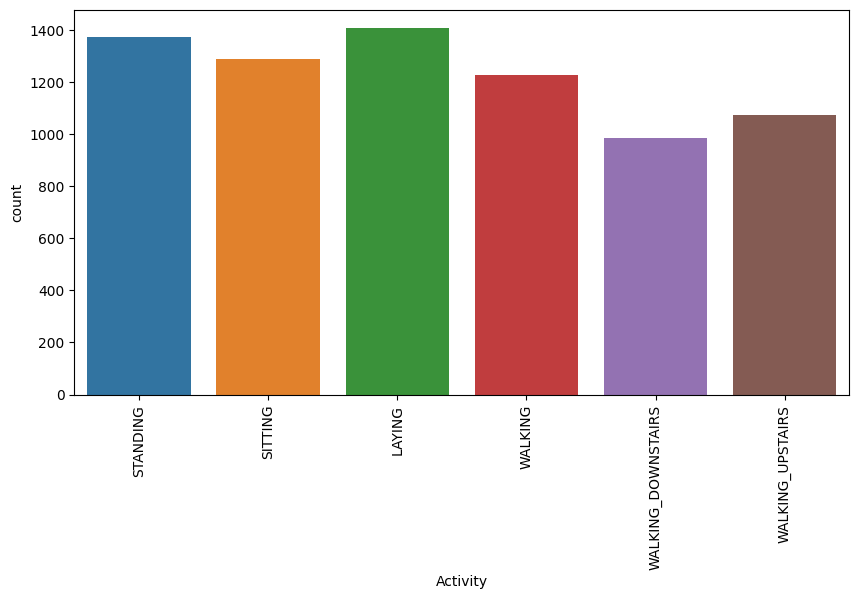

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Activity", data=df_train)
plt.xticks(x = df_train['Activity'],  rotation='vertical')
plt.show()

In [ ]:
#non numerical to numerical
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [ ]:
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(7352,)

In [ ]:
encoder.classes_


array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5881, 561), (1471, 561), (5881,), (1471,))

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
# make predictions on test set
y_pred = svc.predict(X_valid)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with default hyperparameters: 0.9803


In [ ]:
#instantiate classifier with rbf kernel and C=100
svc = SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_valid)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9918


In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_valid)
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9918


In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_valid)
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9844


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_valid)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9803


In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0)
linear_svc1000.fit(X_train, y_train)
y_pred=linear_svc1000.predict(X_valid)
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9803


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_valid)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9721


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0)
poly_svc100.fit(X_train, y_train)
y_pred=poly_svc100.predict(X_valid)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9878


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
sigmoid_svc.fit(X_train,y_train)
y_pred=sigmoid_svc.predict(X_valid)
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8946


In [ ]:
# instantiate classifier with sigmoid kernel and C=100
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0)
sigmoid_svc100.fit(X_train,y_train)
y_pred=sigmoid_svc100.predict(X_valid)
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8477


In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))#check for overfitting

print('Validation set score: {:.4f}'.format(linear_svc.score(X_valid, y_valid)))

Training set score: 0.9971
Validation set score: 0.9844


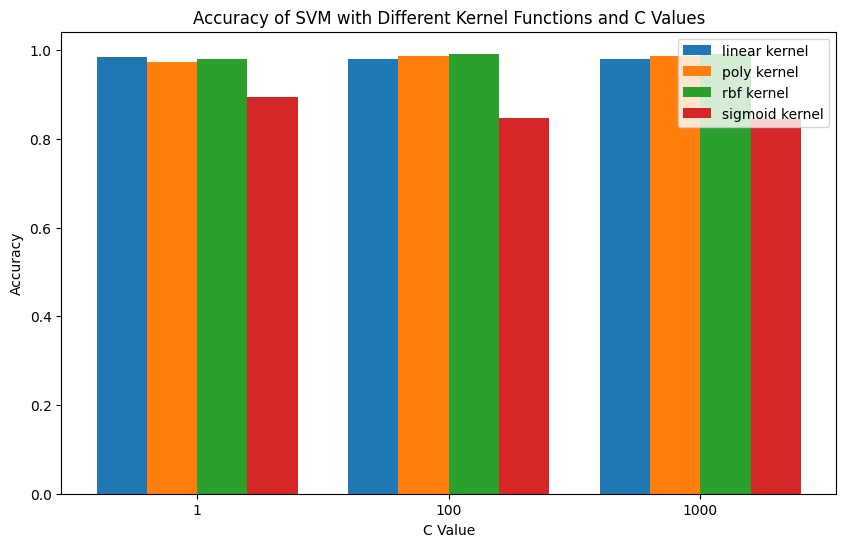

In [ ]:
# List of kernel functions
kernels = ['linear', 'poly', 'rbf','sigmoid']
# List of C values
C_values = [1, 100, 1000]
accuracy_scores = {kernel: [] for kernel in kernels}

# Iterate over kernel functions
for kernel in kernels:
    # Iterate over C values
    for C_val in C_values:
        # Instantiate classifier
        svc_classifier = SVC(kernel=kernel, C=C_val)

        # Fit classifier to the training set
        svc_classifier.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = svc_classifier.predict(X_valid)
        # Compute accuracy score
        acc_score = accuracy_score(y_valid, y_pred)
        # Append accuracy score to the list for the current kernel
        accuracy_scores[kernel].append(acc_score)

# Plotting
bar_width = 0.2
# Position for each group of bars
positions = np.arange(len(C_values))

# Plotting
plt.figure(figsize=(10, 6))

for i, kernel in enumerate(kernels):
    # Calculate the position for each bar in the group
    positions_kernel = positions + i * bar_width

    # Plot the bar for the current kernel
    plt.bar(positions_kernel, accuracy_scores[kernel], width=bar_width, label=f'{kernel} kernel')

# Set x-axis labels and tick positions
plt.xticks(positions + (len(kernels) - 1) * bar_width / 2, C_values)

plt.title('Accuracy of SVM with Different Kernel Functions and C Values')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

